In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [98]:
df = pd.read_csv('/content/drive/MyDrive/crm/customer_data.csv')
df_rv = df[df.TOTAL_VISIT.ne(1)]
df_rv.head(5)

,CUST_CODE,TOTAL_VISIT,TOTAL_SPEND,AVG_TICKET_SIZE,STD_TICKET_SIZE,DUR_SINCE_LAST_PURCH,DUR_SINCE_FIRST_PURCH,LENGTH_OF_STAY,AVG_TIME_TO_EVENT,AVG_WEEKLY_VISIT,STD_WEEKLY_VISIT,AVG_WEEKLY_SPEND,STD_WEEKLY_SPEND,AVG_MONTHLY_VISIT,STD_MONTHLY_VISIT,AVG_MONTHLY_SPEND,STD_MONTHLY_SPEND,PROP_VISIT_WEEKDAY,PROP_VISIT_WEEKEND,AVG_TICKET_SIZE_WEEKDAY,AVG_TICKET_SIZE_WEEKEND,PROP_VISIT_MORNING,PROP_VISIT_AFTERNOON,PROP_VISIT_EVENING,AVG_TICKET_SIZE_MORNING,AVG_TICKET_SIZE_AFTERNOON,AVG_TICKET_SIZE_EVENING,PROP_VISIT_BASKET_FRESH,PROP_VISIT_BASKET_GROCERY,PROP_VISIT_BASKET_NONFOOD,PROP_VISIT_BASKET_MIXED,AVG_TICKET_SIZE_BASKET_FRESH,AVG_TICKET_SIZE_BASKET_GROCERY,AVG_TICKET_SIZE_BASKET_NONFOOD,AVG_TICKET_SIZE_BASKET_MIXED
0,CUST0000367547,413,2469.09,5.978426,3.776035,4,807,803,1.944310,3.560345,1.027961,21.285259,9.526744,14.750000,3.841735,88.181786,28.251424,0.723971,0.276029,6.021338,5.865877,0.777240,0.213075,0.009685,6.069533,5.701477,4.760000,0.658596,0.106538,0.002421,0.232446,6.029559,5.077500,1.350000,6.294687
1,CUST0000337192,366,2158.19,5.896694,5.652981,3,816,813,2.221311,3.485714,1.265771,20.554190,9.159653,13.071429,4.636259,77.078214,26.444783,0.762295,0.237705,5.928638,5.794253,0.336066,0.073770,0.590164,8.469756,2.224815,4.890463,0.819672,0.035519,0.016393,0.114754,6.283200,2.143077,0.793333,5.727143
2,CUST0000550874,49,1281.19,26.146735,7.226069,3,815,812,16.571429,1.065217,0.246909,27.851957,10.138529,2.450000,1.160819,64.059500,30.342708,0.755102,0.244898,26.097297,26.299167,0.428571,0.530612,0.040816,25.972381,25.996538,29.930000,0.142857,0.102041,0.000000,0.755102,30.364286,22.034000,0.000000,25.904595
3,CUST0000068394,344,2833.06,8.235640,8.263680,2,817,815,2.369186,3.017544,1.191950,24.851404,14.208612,12.285714,3.410668,101.180714,25.778357,0.706395,0.293605,8.271070,8.150396,0.488372,0.485465,0.026163,7.353214,9.210778,6.613333,0.767442,0.075581,0.066860,0.087209,9.520076,3.069615,2.955217,5.732333
4,CUST0000142044,135,2472.51,18.314889,11.432736,3,817,814,6.029630,1.363636,0.576554,24.974848,13.998107,4.821429,1.604760,88.303929,46.907739,0.674074,0.325926,17.564286,19.867273,0.296296,0.496296,0.207407,17.792250,17.983433,19.854643,0.585185,0.192593,0.000000,0.214815,18.201646,15.199231,0.000000,22.047931


In [99]:
col = ['AVG_WEEKLY_VISIT', 'AVG_MONTHLY_VISIT','TOTAL_SPEND', 'TOTAL_VISIT', 'AVG_WEEKLY_SPEND', 'AVG_MONTHLY_SPEND', 'AVG_TICKET_SIZE', 'AVG_TICKET_SIZE_BASKET_FRESH', 'AVG_TICKET_SIZE_BASKET_GROCERY', 'AVG_TICKET_SIZE_BASKET_MIXED', 'AVG_TICKET_SIZE_MORNING', 'AVG_TICKET_SIZE_AFTERNOON', 'AVG_TICKET_SIZE_EVENING', 'AVG_TICKET_SIZE_WEEKDAY', 'AVG_TICKET_SIZE_WEEKEND', 'AVG_TICKET_SIZE_BASKET_NONFOOD', 'LENGTH_OF_STAY', 'AVG_TIME_TO_EVENT', 'DUR_SINCE_FIRST_PURCH', 'DUR_SINCE_LAST_PURCH', 'PROP_VISIT_AFTERNOON', 'PROP_VISIT_BASKET_FRESH', 'PROP_VISIT_BASKET_GROCERY', 'PROP_VISIT_BASKET_MIXED', 'PROP_VISIT_BASKET_NONFOOD', 'PROP_VISIT_EVENING', 'PROP_VISIT_MORNING', 'PROP_VISIT_WEEKDAY', 'PROP_VISIT_WEEKEND']
print(col)

['AVG_WEEKLY_VISIT', 'AVG_MONTHLY_VISIT', 'TOTAL_SPEND', 'TOTAL_VISIT', 'AVG_WEEKLY_SPEND', 'AVG_MONTHLY_SPEND', 'AVG_TICKET_SIZE', 'AVG_TICKET_SIZE_BASKET_FRESH', 'AVG_TICKET_SIZE_BASKET_GROCERY', 'AVG_TICKET_SIZE_BASKET_MIXED', 'AVG_TICKET_SIZE_MORNING', 'AVG_TICKET_SIZE_AFTERNOON', 'AVG_TICKET_SIZE_EVENING', 'AVG_TICKET_SIZE_WEEKDAY', 'AVG_TICKET_SIZE_WEEKEND', 'AVG_TICKET_SIZE_BASKET_NONFOOD', 'LENGTH_OF_STAY', 'AVG_TIME_TO_EVENT', 'DUR_SINCE_FIRST_PURCH', 'DUR_SINCE_LAST_PURCH', 'PROP_VISIT_AFTERNOON', 'PROP_VISIT_BASKET_FRESH', 'PROP_VISIT_BASKET_GROCERY', 'PROP_VISIT_BASKET_MIXED', 'PROP_VISIT_BASKET_NONFOOD', 'PROP_VISIT_EVENING', 'PROP_VISIT_MORNING', 'PROP_VISIT_WEEKDAY', 'PROP_VISIT_WEEKEND']


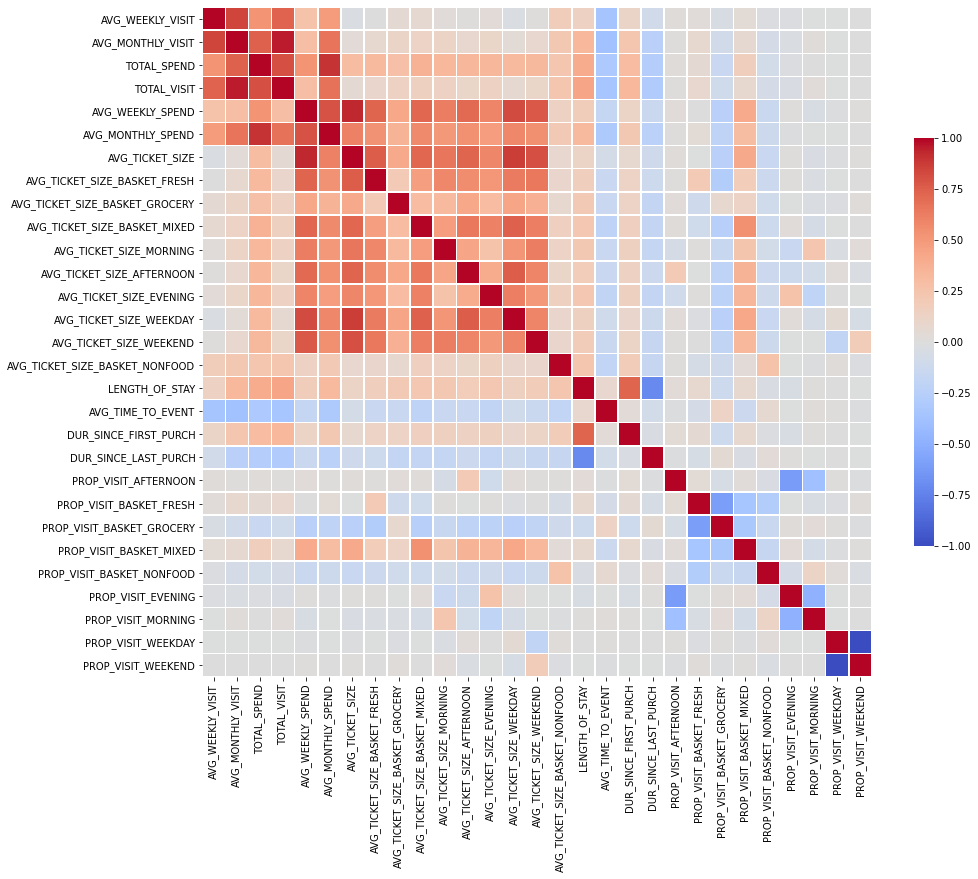

In [100]:
corr = df_rv[col].corr()

f, axes = plt.subplots(figsize=(15, 15))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [101]:
col2 = ['CUST_CODE', 'AVG_MONTHLY_SPEND', 'AVG_MONTHLY_VISIT','TOTAL_SPEND', 'TOTAL_VISIT', 'AVG_TICKET_SIZE_BASKET_FRESH', 'AVG_TICKET_SIZE_BASKET_GROCERY', 'AVG_TICKET_SIZE_BASKET_MIXED', 'AVG_TICKET_SIZE_MORNING', 'AVG_TICKET_SIZE_AFTERNOON', 'AVG_TICKET_SIZE_EVENING', 'AVG_TICKET_SIZE_WEEKDAY', 'AVG_TICKET_SIZE_WEEKEND']
df_final = df_rv[col2]
df_final.head(5)

,CUST_CODE,AVG_MONTHLY_SPEND,AVG_MONTHLY_VISIT,TOTAL_SPEND,TOTAL_VISIT,AVG_TICKET_SIZE_BASKET_FRESH,AVG_TICKET_SIZE_BASKET_GROCERY,AVG_TICKET_SIZE_BASKET_MIXED,AVG_TICKET_SIZE_MORNING,AVG_TICKET_SIZE_AFTERNOON,AVG_TICKET_SIZE_EVENING,AVG_TICKET_SIZE_WEEKDAY,AVG_TICKET_SIZE_WEEKEND
0,CUST0000367547,88.181786,14.750000,2469.09,413,6.029559,5.077500,6.294687,6.069533,5.701477,4.760000,6.021338,5.865877
1,CUST0000337192,77.078214,13.071429,2158.19,366,6.283200,2.143077,5.727143,8.469756,2.224815,4.890463,5.928638,5.794253
2,CUST0000550874,64.059500,2.450000,1281.19,49,30.364286,22.034000,25.904595,25.972381,25.996538,29.930000,26.097297,26.299167
3,CUST0000068394,101.180714,12.285714,2833.06,344,9.520076,3.069615,5.732333,7.353214,9.210778,6.613333,8.271070,8.150396
4,CUST0000142044,88.303929,4.821429,2472.51,135,18.201646,15.199231,22.047931,17.792250,17.983433,19.854643,17.564286,19.867273


In [102]:
col3 = ['AVG_MONTHLY_SPEND', 'AVG_MONTHLY_VISIT','TOTAL_SPEND', 'TOTAL_VISIT', 'AVG_TICKET_SIZE_BASKET_FRESH', 'AVG_TICKET_SIZE_BASKET_GROCERY', 'AVG_TICKET_SIZE_BASKET_MIXED', 'AVG_TICKET_SIZE_MORNING', 'AVG_TICKET_SIZE_AFTERNOON', 'AVG_TICKET_SIZE_EVENING', 'AVG_TICKET_SIZE_WEEKDAY', 'AVG_TICKET_SIZE_WEEKEND']

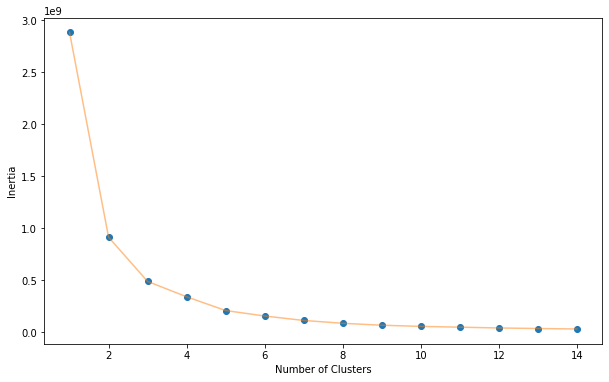

In [103]:
inertia = []
N = range(1, 15)
for i in N:
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit_predict(df_final[col3])
    inertia.append(kmeans.inertia_)

plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [108]:
cluster = KMeans(n_clusters=4)
df_final['CLUSTER'] = cluster.fit_predict(df_final[col3])
df_final.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CUST_CODE,AVG_MONTHLY_SPEND,AVG_MONTHLY_VISIT,TOTAL_SPEND,TOTAL_VISIT,AVG_TICKET_SIZE_BASKET_FRESH,AVG_TICKET_SIZE_BASKET_GROCERY,AVG_TICKET_SIZE_BASKET_MIXED,AVG_TICKET_SIZE_MORNING,AVG_TICKET_SIZE_AFTERNOON,AVG_TICKET_SIZE_EVENING,AVG_TICKET_SIZE_WEEKDAY,AVG_TICKET_SIZE_WEEKEND,CLUSTER
0,CUST0000367547,88.181786,14.750000,2469.09,413,6.029559,5.077500,6.294687,6.069533,5.701477,4.760000,6.021338,5.865877,0
1,CUST0000337192,77.078214,13.071429,2158.19,366,6.283200,2.143077,5.727143,8.469756,2.224815,4.890463,5.928638,5.794253,0
2,CUST0000550874,64.059500,2.450000,1281.19,49,30.364286,22.034000,25.904595,25.972381,25.996538,29.930000,26.097297,26.299167,3
3,CUST0000068394,101.180714,12.285714,2833.06,344,9.520076,3.069615,5.732333,7.353214,9.210778,6.613333,8.271070,8.150396,0
4,CUST0000142044,88.303929,4.821429,2472.51,135,18.201646,15.199231,22.047931,17.792250,17.983433,19.854643,17.564286,19.867273,0


In [109]:
df_final.CLUSTER.value_counts().sort_index()

0     192
1    3357
2      78
3     448
Name: CLUSTER, dtype: int64

In [116]:
desc = df_final.groupby('CLUSTER').describe()
desc

AVG_MONTHLY_SPEND              ... AVG_TICKET_SIZE_WEEKEND            
                    count        mean  ...                     75%         max
CLUSTER                                ...                                    
0                   192.0   88.407646  ...               25.416393   62.200000
1                  3357.0   12.993370  ...                8.727500  133.080000
2                    78.0  169.774878  ...               29.732790   63.191143
3                   448.0   47.535991  ...               21.379833  306.970000

[4 rows x 96 columns]

In [121]:
x = df_final.iloc[:,1:-1]
y = df_final['CLUSTER']

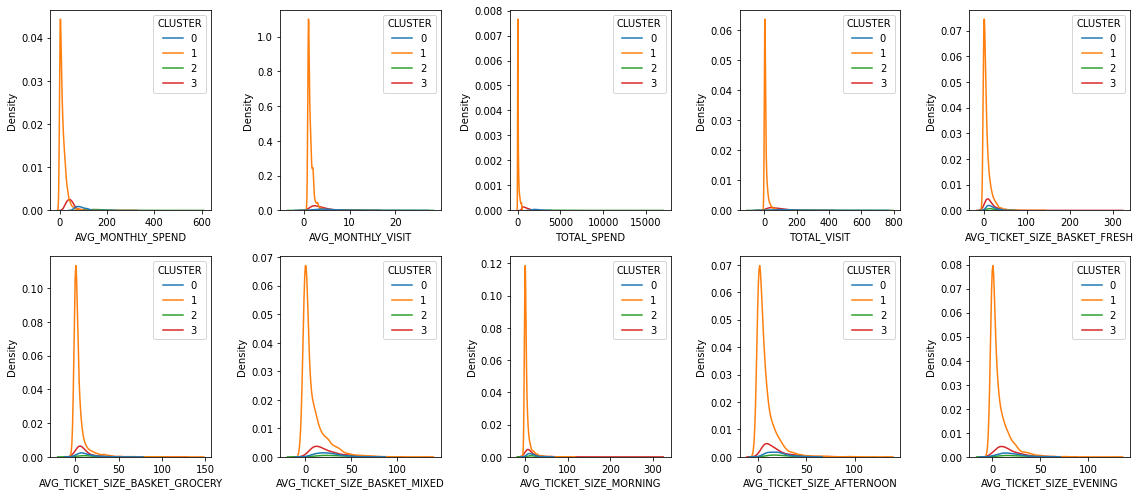

In [124]:
palette = 'tab10'
fig, axes = plt.subplots(2,5, figsize=(16,7), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(df_final.iloc[:,1:-1].columns, axes):
    sns.kdeplot(data=df_final, x=col, hue='CLUSTER', palette=palette, ax=ax)
plt.show()

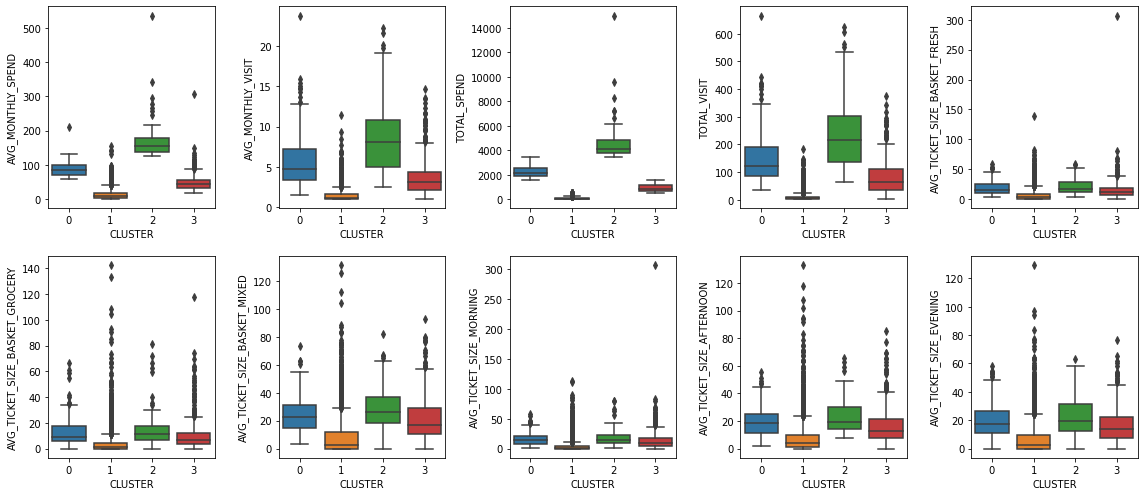

In [126]:
fig, axes = plt.subplots(2,5, figsize=(16,7), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(df_final.iloc[:,1:-1].columns, axes):
    sns.boxplot(data=df_final, y=col, x='CLUSTER', palette=palette, ax=ax)
plt.show()

In [131]:
X = df_final[['AVG_MONTHLY_SPEND', 'AVG_MONTHLY_VISIT','TOTAL_SPEND', 'TOTAL_VISIT', 'AVG_TICKET_SIZE_BASKET_FRESH', 'AVG_TICKET_SIZE_BASKET_GROCERY', 'AVG_TICKET_SIZE_BASKET_MIXED', 'AVG_TICKET_SIZE_MORNING', 'AVG_TICKET_SIZE_AFTERNOON', 'AVG_TICKET_SIZE_EVENING', 'AVG_TICKET_SIZE_WEEKDAY', 'AVG_TICKET_SIZE_WEEKEND']]
y = df_final['CLUSTER'] 

X_std = scale(X)

clf = RandomForestClassifier(criterion = 'entropy', random_state = 42)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [132]:
fimp = pd.DataFrame({'feature': X.columns, 'importance' : clf.feature_importances_}).set_index('feature')
fimp.sort_values('importance', ascending=False)

,importance
feature,
TOTAL_SPEND,0.478194
AVG_MONTHLY_SPEND,0.167630
TOTAL_VISIT,0.135338
AVG_MONTHLY_VISIT,0.093783
AVG_TICKET_SIZE_MORNING,0.025710
AVG_TICKET_SIZE_AFTERNOON,0.022642
AVG_TICKET_SIZE_WEEKEND,0.020846
AVG_TICKET_SIZE_BASKET_MIXED,0.019364
AVG_TICKET_SIZE_WEEKDAY,0.013171


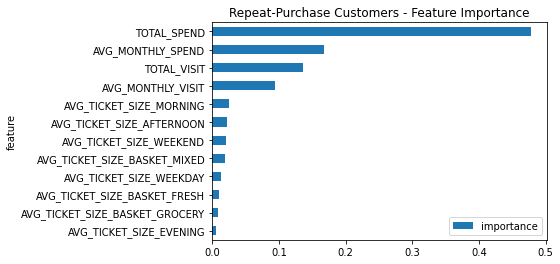

In [133]:
fimp.sort_values('importance').plot.barh(title='Repeat-Purchase Customers - Feature Importance');